In [68]:
! nvidia-smi

Wed Nov 20 11:50:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    31W / 250W |   2701MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from fastai import *
from fastai.text import *

In [0]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
pd.set_option('display.max_colwidth', -1)

In [4]:
train_df[train_df['event']==71].tail(5)

,text,sex,age,event
153927,23 YO F C O 1 DAY OF THROAT PAIN ALSO LOWER BACK PAIN 1 DAY LIFTS HEAVYOBJECTS AT WORK ALL THE TIME DX PHARHYNGITIS LUMBAR STRAIN,2,23,71
153928,48 YM TECH AT WORK LIFTING PTS AND PULLED A MUSCLE IN BACK DX LOW BACKSPRAIN,1,48,71
153945,57YOM WITH LOW BACK PAIN AFTER LIFTING A HEAVY BOX AT WORK DX PAIN,1,57,71
153949,55YOF WITH ABDOMINAL PAIN STS AT WORK DOING HEAVY LIFTING FELT A RIPPING TEARING SENSATION TO R LOWER ABDOMEN DX R ABDOMINAL WALL STRAIN,2,55,71
153951,19YOF DOING UNSPECIFIED LIFTING AT WORK AND DEVELOPED PAIN ACROSS CHES T CHEST PAIN,2,19,71


In [0]:
(train_df['event'].value_counts())

In [6]:
test_df.head()

,text,sex,age
0,54 Y O F PUNCTURE WOUND OF FIINGER RE ATTACHING A CAP ON AN INSULIN SYRING SHE HAD JUST USED ON HER HOME CARE PATIENT,2,54
1,22 YOM CONTUSION TO LT LOWER LEG S P MVC HIT BY CAR GUIDING IN A CAR GAS PEDAL GOT STUCK PUSHING HIM AGAINST DOOR WORK YESTERDAY AM,1,22
2,20 YOM PT WORKS IN A QUARRY WAS ATTEMPTING TO DISLODGE A LARGE ROCK AND DEVELOPED CHEST PAINS DX CHEST WALL PAIN,1,20
3,38 YOF WAS WALKING AT WORK TWISTED HER LT ANKLE LATER HER RIGHT KNEE DX LEFT ANKLE AND KNEE SPRAIN,2,38
4,44 YOM C O LOW BACK PAIN AFTER LIFTING A BOX AT WORK TODAY DX LEFT SIDED LOW BACK PAIN,1,44


In [0]:
lm_df = pd.DataFrame(pd.concat([train_df['text'], test_df['text']]))
lm_df.reset_index(drop=True, inplace=True)

In [37]:
lm_df

,text
0,57YOM WITH CONTUSION TO FACE AFTER STRIKING IT WITH A POST POUNDER WHILE SETTING A FENCE POST
1,A 45YOM FELL ON ARM WHILE WORKING HAD SLIPPED ON WATER FX WRIST
2,58YOM WITH CERVICAL STRAIN BACK PAIN S P RESTRAINED TAXI DRIVER IN LOW SPEED REAR END MVC NO LOC NO AB DEPLOYED
3,33 YOM LAC TO HAND FROM A RAZOR KNIFE
4,53YOM AT WORK IN A WAREHOUSE DOING UNSPECIFIED LIFTING AND STRAINED LO WER BACK
...,...
229815,49YOM COACHING FOOTBALL WHEN COLLIDED WITH PLAYER PAIN RT LEG DIFF BREATHING DX FX 1 RIB LEFT SIDE CLD FX SPRAIN RT ANKLE
229816,33 YO MALE WAS USING WIRE BRUSH AT WORK WHEN PIECE OF IT GOT IN HIS EYE DX FOREIGN BODY IN EYE
229817,36YOM LIFTING AT WORK BACK PX DX THORACIC STRAIN
229818,24 YO F PT WAS AT WORK WHEN SHE POKED LT THUMB WTH A NEEDLE AFTER DRAWING BLOOD ON A PATIENT DX PUNCTURE WOUND LT THUMB


In [0]:
lm_df.to_csv('./lm_csv.csv')

In [0]:
df_lm = pd.read_csv('./lm_csv.csv')
df_lm.drop(['Unnamed: 0'], inplace=True, axis=1)

In [0]:
path = Path('./')

In [0]:
data_lm_fwd = TextList.from_df(df_lm, path=path).split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=48)

In [0]:
learn_fwd = language_model_learner(data_lm_fwd, AWD_LSTM, drop_mult=0.3)

In [0]:
! mkdir models

In [0]:
learn_fwd.model_dir='./models/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 1.32E-01


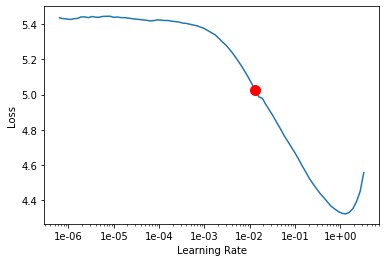

In [75]:
learn_fwd.lr_find()
learn_fwd.recorder.plot(suggestion=True)

In [76]:
learn_fwd.fit_one_cycle(10, 7e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.005582,1.900786,0.627057,03:26
1,2.104741,1.980135,0.620837,03:24
2,2.201936,2.068821,0.610563,03:24
3,2.157551,1.990729,0.620331,03:24
4,2.074945,1.950254,0.623916,03:25
5,2.025732,1.903022,0.628469,03:25
6,1.959563,1.848359,0.635170,03:25
7,1.902043,1.791701,0.641212,03:25
8,1.822499,1.754884,0.645705,03:25
9,1.789958,1.744916,0.647315,03:25


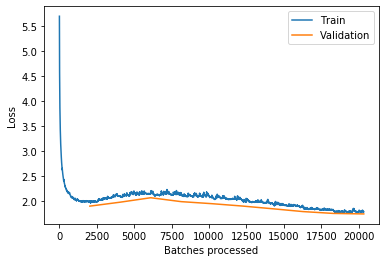

In [77]:
learn_fwd.recorder.plot_losses()

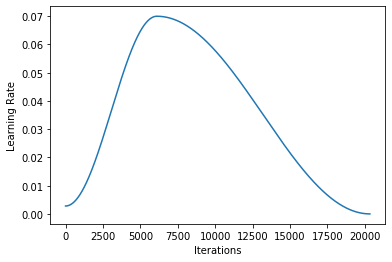

In [78]:
learn_fwd.recorder.plot_lr()

In [0]:
learn_fwd.save('lm-head-fwd-2')

In [0]:
learn_fwd.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 9.12E-08


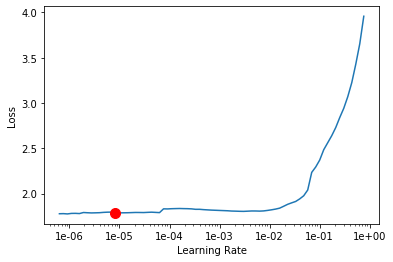

In [81]:
learn_fwd.lr_find()
learn_fwd.recorder.plot(suggestion=True)

In [82]:
learn_fwd.fit_one_cycle(5, slice(8e-06, 7e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.714212,1.693523,0.653393,04:14
1,1.668740,1.643182,0.661053,04:13
2,1.613069,1.603994,0.666812,04:12
3,1.565202,1.581553,0.670603,04:14
4,1.520480,1.577712,0.671522,04:13


In [0]:
learn_fwd.save('lm-unfr-pwd-2')

In [59]:
learn_fwd

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (206838 items)
x: LMTextList
xxbos xxup 57yom xxup with xxup contusion xxup to xxup face xxup after xxup striking xxup it xxup with a xxup post xxup pounder xxup while xxup setting a xxup fence xxup post,xxbos a xxup 45yom xxup fell xxup on xxup arm xxup while xxup working xxup had xxup slipped xxup on xxup water xxup fx xxup wrist,xxbos xxup 58yom xxup with xxup cervical xxup strain xxup back xxup pain s p xxup restrained xxup taxi xxup driver xxup in xxup low xxup speed xxup rear xxup end xxup mvc xxup no xxup loc xxup no xxup ab xxup deployed,xxbos 33 xxup yom xxup lac xxup to xxup hand xxup from a xxup razor xxup knife,xxbos xxup 53yom xxup at xxup work xxup in a xxup warehouse xxup doing xxup unspecified xxup lifting xxup and xxup strained xxup lo xxup wer xxup back
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (22982 items)
x: LMTextList
xxbos xxup 29yf xxup works xxup subject xxup was xxup spit xxup in xxup her xxup face x

In [0]:
learn_fwd.save_encoder('fine_tuned_fwd_enc')

# Text Classification

In [0]:
bs=48

In [0]:
data_clas_fwd = (TextList.from_df(train_df, path, cols='text', vocab=data_lm_fwd.vocab)
             #grab all the text files in path
             .split_by_rand_pct(0.10, seed=42)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='event')
             #label them all with their folders
             .databunch(bs=bs, num_workers=1))

In [0]:
learn_c_fwd = text_classifier_learner(data_clas_fwd, AWD_LSTM, drop_mult=0.3) #.to_fp16()
learn_c_fwd.load_encoder('fine_tuned_fwd_enc')
learn_c_fwd.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 6.31E-02


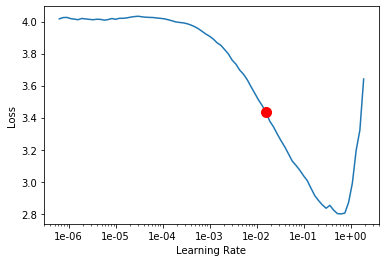

In [89]:
learn_c_fwd.lr_find()
learn_c_fwd.recorder.plot(suggestion=True)

In [90]:
learn_c_fwd.fit_one_cycle(10, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.909438,0.726795,0.766937,01:12
1,0.874260,0.714658,0.770835,01:12
2,0.884494,0.725685,0.764599,01:10
3,0.860085,0.691065,0.776356,01:10
4,0.816157,0.670555,0.788893,01:07
5,0.809985,0.645804,0.794868,01:12
6,0.742627,0.622663,0.801104,01:12
7,0.778381,0.593729,0.810588,01:13
8,0.734510,0.577939,0.813251,01:12
9,0.721199,0.574789,0.819032,01:08


In [0]:
learn_c_fwd.save('learn_head_fwd-10ep-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 2.75E-05


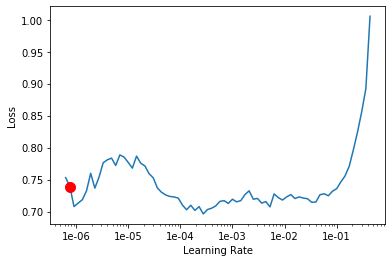

In [92]:
learn_c_fwd.lr_find()
learn_c_fwd.recorder.plot(suggestion=True)

In [93]:
learn_c_fwd.fit_one_cycle(5, 5e-5, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.695326,0.574785,0.818902,01:07
1,0.695511,0.575495,0.818837,01:09
2,0.735509,0.574997,0.819682,01:10
3,0.711362,0.573137,0.817863,01:09
4,0.695241,0.573639,0.818772,01:08


In [0]:
learn_c_fwd.save('learn_head_fwd-15ep-2')

### Continuing with older 10ep head

In [125]:
learn_c_fwd.load('learn_head_fwd-5ep-2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (138561 items)
x: TextList
xxbos a xxup 45yom xxup fell xxup on xxup arm xxup while xxup working xxup had xxup slipped xxup on xxup water xxup fx xxup wrist,xxbos xxup 58yom xxup with xxup cervical xxup strain xxup back xxup pain s p xxup restrained xxup taxi xxup driver xxup in xxup low xxup speed xxup rear xxup end xxup mvc xxup no xxup loc xxup no xxup ab xxup deployed,xxbos 33 xxup yom xxup lac xxup to xxup hand xxup from a xxup razor xxup knife,xxbos xxup 53yom xxup at xxup work xxup in a xxup warehouse xxup doing xxup unspecified xxup lifting xxup and xxup strained xxup lo xxup wer xxup back,xxbos xxup 31yom xxup at a xxup clients xxup home xxup trimming a xxup tree xxup with a xxup chain xxup saw xxup and xxup the xxup saw xxup kicked xxup back xxup hit xxup lower xxup arm xxup laceration xxup to xxup lower xxup arm
y: CategoryList
42,26,60,71,62
Path: .;

Valid: LabelList (15395 items)
x: TextList
xxbos xxup 58ym xxup doing x

In [0]:
learn_c_fwd.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.63E-06


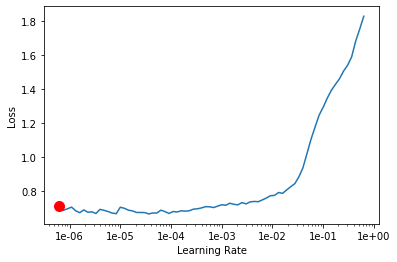

In [127]:
learn_c_fwd.lr_find()
learn_c_fwd.recorder.plot(suggestion=True)

In [128]:
learn_c_fwd.fit_one_cycle(8, slice(9e-7, 2e-02), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.616818,0.531400,0.836635,03:02
1,0.631257,0.506391,0.846833,02:59
2,0.513936,0.495868,0.853264,02:55
3,0.458003,0.448469,0.863397,02:54
4,0.432446,0.418057,0.871647,02:55
5,0.357527,0.421607,0.872426,03:01
6,0.321717,0.412734,0.875414,02:58
7,0.302479,0.414331,0.874959,02:57


In [0]:
learn_c_fwd.save('lrn_unf_fwd-8ep-again')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 2.51E-04


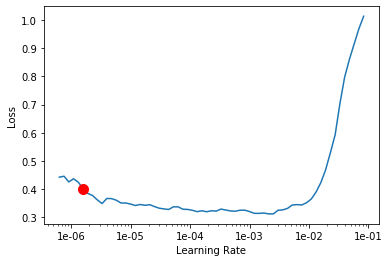

In [73]:
learn_c_fwd.lr_find()
learn_c_fwd.recorder.plot(suggestion=True)

In [74]:
learn_c_fwd.fit_one_cycle(5, slice(9e-7, 2e-02), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.428837,0.462288,0.859890,03:01
1,0.426949,0.464285,0.861838,02:49
2,0.398746,0.450045,0.862683,03:02
3,0.279826,0.445797,0.872491,03:03
4,0.253518,0.454282,0.871517,02:54


In [0]:
learn_c_fwd.save('learn_unfr_fwd-10ep')

# Testing

In [0]:
data_clas_fwd.add_test(test_df['text'])

In [78]:
DatasetType.Train.value

1

In [0]:
preds_fwd = learn_c_fwd.get_preds(DatasetType.Test)

In [0]:
class_labels = np.argmax(preds_fwd[0], 1)

In [0]:
predictions = [learn_c_fwd.data.classes[i] for i in class_labels]

In [133]:
len(predictions)

75864

In [134]:
pred_df_fwd = pd.DataFrame({'event':predictions})
pred_df_fwd.head()

,event
0,55
1,24
2,71
3,73
4,71


In [135]:
sub_df = pd.concat([test_df, pred_df_fwd], axis=1)
sub_df

,text,sex,age,event
0,54 Y O F PUNCTURE WOUND OF FIINGER RE ATTACHING A CAP ON AN INSULIN SYRING SHE HAD JUST USED ON HER HOME CARE PATIENT,2,54,55
1,22 YOM CONTUSION TO LT LOWER LEG S P MVC HIT BY CAR GUIDING IN A CAR GAS PEDAL GOT STUCK PUSHING HIM AGAINST DOOR WORK YESTERDAY AM,1,22,24
2,20 YOM PT WORKS IN A QUARRY WAS ATTEMPTING TO DISLODGE A LARGE ROCK AND DEVELOPED CHEST PAINS DX CHEST WALL PAIN,1,20,71
3,38 YOF WAS WALKING AT WORK TWISTED HER LT ANKLE LATER HER RIGHT KNEE DX LEFT ANKLE AND KNEE SPRAIN,2,38,73
4,44 YOM C O LOW BACK PAIN AFTER LIFTING A BOX AT WORK TODAY DX LEFT SIDED LOW BACK PAIN,1,44,71
...,...,...,...,...
75859,49YOM COACHING FOOTBALL WHEN COLLIDED WITH PLAYER PAIN RT LEG DIFF BREATHING DX FX 1 RIB LEFT SIDE CLD FX SPRAIN RT ANKLE,1,49,12
75860,33 YO MALE WAS USING WIRE BRUSH AT WORK WHEN PIECE OF IT GOT IN HIS EYE DX FOREIGN BODY IN EYE,1,33,66
75861,36YOM LIFTING AT WORK BACK PX DX THORACIC STRAIN,1,36,71
75862,24 YO F PT WAS AT WORK WHEN SHE POKED LT THUMB WTH A NEEDLE AFTER DRAWING BLOOD ON A PATIENT DX PUNCTURE WOUND LT THUMB,2,24,55


In [0]:
sub_df.to_csv('./models/solution_3_fwd.csv', index=False)

# Backwards Language Model

In [0]:
df_lm = pd.read_csv('./lm_csv.csv')
df_lm.drop(['Unnamed: 0'], inplace=True, axis=1)

In [14]:
df_lm.head()

,text
0,57YOM WITH CONTUSION TO FACE AFTER STRIKING IT WITH A POST POUNDER WHILE SETTING A FENCE POST
1,A 45YOM FELL ON ARM WHILE WORKING HAD SLIPPED ON WATER FX WRIST
2,58YOM WITH CERVICAL STRAIN BACK PAIN S P RESTRAINED TAXI DRIVER IN LOW SPEED REAR END MVC NO LOC NO AB DEPLOYED
3,33 YOM LAC TO HAND FROM A RAZOR KNIFE
4,53YOM AT WORK IN A WAREHOUSE DOING UNSPECIFIED LIFTING AND STRAINED LO WER BACK


In [0]:
path = Path('./')

In [0]:
data_lm_bwd = TextList.from_df(df_lm, path=path).split_by_rand_pct(0.1, seed=42).label_for_lm().databunch(bs=48, backwards=True)

In [0]:
learn_bwd = language_model_learner(data_lm_bwd, AWD_LSTM, drop_mult=0.3)

In [0]:
! mkdir models

In [0]:
learn_bwd.model_dir = './models'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 1.10E-01


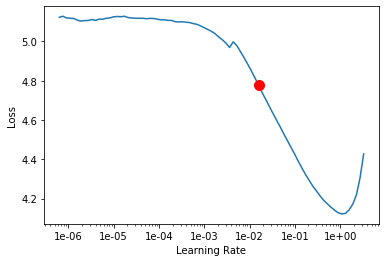

In [21]:
learn_bwd.lr_find()
learn_bwd.recorder.plot(suggestion=True)

In [29]:
learn_bwd.fit_one_cycle(10, 7e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.983491,1.903103,0.650138,03:23
1,2.118572,2.002623,0.642974,03:23
2,2.191109,2.037693,0.639324,03:23
3,2.187355,2.024493,0.641470,03:22
4,2.119070,1.974500,0.643872,03:23
5,2.045282,1.924555,0.648838,03:23
6,1.968151,1.867452,0.653809,03:23
7,1.897672,1.808767,0.660325,03:23
8,1.832332,1.766834,0.664566,03:23
9,1.792102,1.757152,0.665681,03:23


In [0]:
learn_bwd.save('lm_bwd_head')

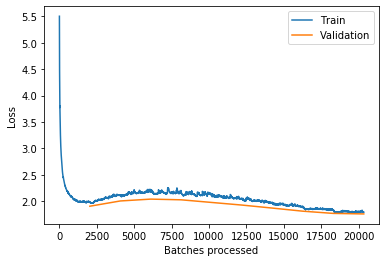

In [31]:
learn_bwd.recorder.plot_losses()

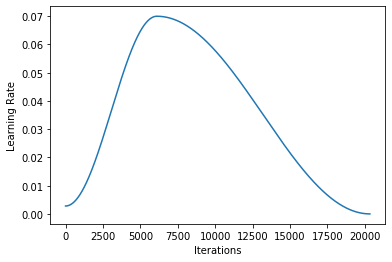

In [32]:
learn_bwd.recorder.plot_lr()

In [0]:
learn_bwd.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-05
Min loss divided by 10: 1.10E-07


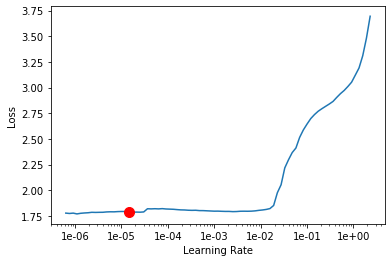

In [34]:
learn_bwd.lr_find()
learn_bwd.recorder.plot(suggestion=True)

In [35]:
learn_bwd.fit_one_cycle(5, slice(1e-06, 7e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.759124,1.723677,0.668205,04:11
1,1.704841,1.682640,0.673537,04:14
2,1.662943,1.649143,0.677984,04:13
3,1.626690,1.629588,0.680680,04:13
4,1.597539,1.625727,0.681504,04:13


In [0]:
learn_bwd.save('lm-bwd-finetuned')

In [0]:
learn_bwd.save_encoder('lm-bwd-enc')

# Classifier

In [0]:
data_clas_bwd = (TextList.from_df(train_df, path, cols='text', vocab=data_lm_bwd.vocab)
             #grab all the text files in path
             .split_by_rand_pct(0.10, seed=42)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='event')
             #label them all with their folders
             .databunch(bs=48, num_workers=1, backwards=True))

In [0]:
learn_c_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, drop_mult=0.3) #.to_fp16()
learn_c_bwd.load_encoder('lm-bwd-enc')
learn_c_bwd.freeze()

In [0]:
learn_c_bwd.model_dir = './models/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 6.31E-02


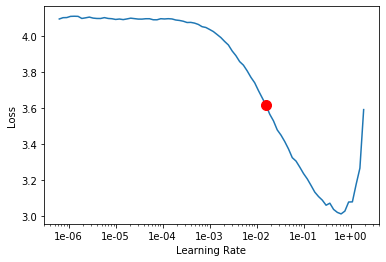

In [42]:
learn_c_bwd.lr_find()
learn_c_bwd.recorder.plot(suggestion=True)

In [44]:
learn_c_bwd.fit_one_cycle(10, 7e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.365320,1.020456,0.684378,01:10
1,1.496263,1.027050,0.683534,01:09
2,1.475682,1.179648,0.636505,01:12
3,1.568829,1.085163,0.668724,01:09
4,1.504902,1.070599,0.663007,01:11
5,1.372552,0.982523,0.693472,01:08
6,1.356341,0.915525,0.715557,01:10
7,1.272299,0.843687,0.734784,01:09
8,1.159901,0.810428,0.743748,01:13
9,1.196788,0.787977,0.752777,01:09


In [0]:
learn_c_bwd.save('classifier-bwd-head')

In [0]:
learn_c_bwd.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-05
Min loss divided by 10: 1.20E-04


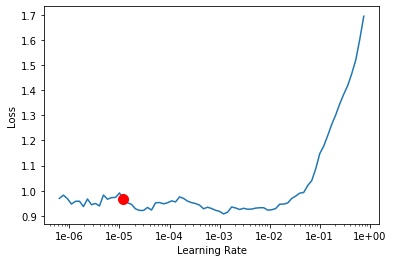

In [47]:
learn_c_bwd.lr_find()
learn_c_bwd.recorder.plot(suggestion=True)

In [51]:
learn_c_bwd.fit_one_cycle(7, slice(1e-05, 7e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.667476,0.521421,0.836765,03:02
1,0.557792,0.457474,0.856317,02:44
2,0.528810,0.445262,0.862098,02:56
3,0.420384,0.411115,0.872101,02:48
4,0.355985,0.404457,0.873920,02:52
5,0.315007,0.410034,0.876453,02:55
6,0.304612,0.407812,0.877493,02:53


In [0]:
learn_c_bwd.save('cfr-bwd-ft-10ep')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 2.09E-04


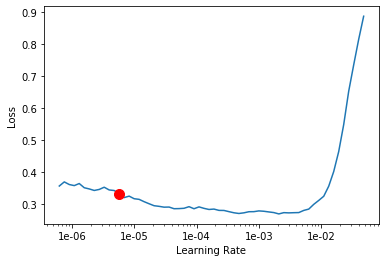

In [53]:
learn_c_bwd.lr_find()
learn_c_bwd.recorder.plot(suggestion=True)

In [54]:
learn_c_bwd.fit_one_cycle(4, slice(1e-05, 7e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.388381,0.434116,0.868789,02:45
1,0.375654,0.435107,0.870023,02:50
2,0.292952,0.430110,0.876583,02:49
3,0.231228,0.449792,0.873530,02:51


In [0]:
learn_c_bwd.load('cfr-bwd-ft-10ep')

# Test for Backwards model

In [0]:
data_clas_bwd.add_test(test_df['text'])

In [0]:
def predict_test(learn, dataset):
    preds = learn.get_preds(dataset)
    class_labels = np.argmax(preds[0], 1)
    predictions = [learn.data.classes[i] for i in class_labels]
    pred_df = pd.DataFrame({'event':predictions})
    sub_df = pd.concat([test_df, pred_df], axis=1)
    return preds, sub_df

In [60]:
DatasetType.Test

<DatasetType.Test: 3>

In [0]:
preds_bwd, sub_df = predict_test(learn_c_bwd, DatasetType.Test)

In [62]:
sub_df.head()

,text,sex,age,event
0,54 Y O F PUNCTURE WOUND OF FIINGER RE ATTACHING A CAP ON AN INSULIN SYRING SHE HAD JUST USED ON HER HOME CARE PATIENT,2,54,55
1,22 YOM CONTUSION TO LT LOWER LEG S P MVC HIT BY CAR GUIDING IN A CAR GAS PEDAL GOT STUCK PUSHING HIM AGAINST DOOR WORK YESTERDAY AM,1,22,62
2,20 YOM PT WORKS IN A QUARRY WAS ATTEMPTING TO DISLODGE A LARGE ROCK AND DEVELOPED CHEST PAINS DX CHEST WALL PAIN,1,20,71
3,38 YOF WAS WALKING AT WORK TWISTED HER LT ANKLE LATER HER RIGHT KNEE DX LEFT ANKLE AND KNEE SPRAIN,2,38,73
4,44 YOM C O LOW BACK PAIN AFTER LIFTING A BOX AT WORK TODAY DX LEFT SIDED LOW BACK PAIN,1,44,71


In [0]:
sub_df.to_csv('./solution_bwd.csv', index=False)

In [0]:
from IPython.display import FileLink

In [67]:
FileLink('./models/cfr-bwd-ft-10ep.pth')

/content/models/cfr-bwd-ft-10ep.pth

# Ensembling Forward and Backward model

In [137]:
len(preds_bwd[0])

75864

In [138]:
len(preds_fwd[0])

75864

In [0]:
scores_ensembles = []
scores_ensembles.append(preds_fwd[0])
scores_ensembles.append(preds_bwd[0])
ensemble_scores = sum(scores_ensembles)/len(scores_ensembles)
ensemble_preds = np.argmax(ensemble_scores,1)
emsemble_pred_classes = [learn_c_fwd.data.classes[x] for x in ensemble_preds]

In [0]:
ensemble_pred_df = pd.DataFrame({'event':emsemble_pred_classes})
ensemble_sub_df = pd.concat([test_df, ensemble_pred_df], axis=1)

In [0]:
ensemble_sub_df.to_csv('./ensemble_fwd_bwd-2.csv', index=False)

In [143]:
len(ensemble_scores)

75864

In [0]:
ensemble_numpy = np.array(ensemble_scores)

In [0]:
f = io.BytesIO()

In [0]:
np.save(f, ensemble_numpy)

In [147]:
ls

ensemble_fwd_bwd-2.csv  learn_unfr_fwd-10ep.pth  sample_data/      train.csv
ensemble_fwd_bwd.csv    lm_csv.csv               solution_bwd.csv
fine_tuned_fwd_enc.pth  models/                  test.csv


In [148]:
type(ensemble_scores)

torch.Tensor

In [0]:
torch.save(preds_fwd, 'pred_fwd_tensor.pt')